In [1]:
import pandas as pd

historical_wave_1 = pd.read_parquet('/work/Data/openmeteo/Wave/historical_wave_NL1.parquet')
historical_wind_1 = pd.read_parquet("/work/Data/Wind_power/historical_wind_5214_0345_NL_power.parquet")
historical_wave_1 

date  wave_height  wave_direction  wave_period
0     2015-01-01 00:00:00+00:00         1.62           237.0         4.85
1     2015-01-01 01:00:00+00:00         1.66           235.0         4.90
2     2015-01-01 02:00:00+00:00         1.68           232.0         4.95
3     2015-01-01 03:00:00+00:00         1.70           231.0         5.00
4     2015-01-01 04:00:00+00:00         1.68           233.0         5.05
...                         ...          ...             ...          ...
78883 2023-12-31 19:00:00+00:00         2.92           224.0         6.50
78884 2023-12-31 20:00:00+00:00         2.88           226.0         6.45
78885 2023-12-31 21:00:00+00:00         2.92           227.0         6.35
78886 2023-12-31 22:00:00+00:00         2.96           227.0         6.35
78887 2023-12-31 23:00:00+00:00         2.98           230.0         6.35

[78888 rows x 4 columns]

In [2]:
historical_wave_1['Power potential']= 0.5* historical_wave_1['wave_height']*historical_wave_1['wave_height']*historical_wave_1['wave_period']
historical_wave_1

date  wave_height  wave_direction  wave_period  \
0     2015-01-01 00:00:00+00:00         1.62           237.0         4.85   
1     2015-01-01 01:00:00+00:00         1.66           235.0         4.90   
2     2015-01-01 02:00:00+00:00         1.68           232.0         4.95   
3     2015-01-01 03:00:00+00:00         1.70           231.0         5.00   
4     2015-01-01 04:00:00+00:00         1.68           233.0         5.05   
...                         ...          ...             ...          ...   
78883 2023-12-31 19:00:00+00:00         2.92           224.0         6.50   
78884 2023-12-31 20:00:00+00:00         2.88           226.0         6.45   
78885 2023-12-31 21:00:00+00:00         2.92           227.0         6.35   
78886 2023-12-31 22:00:00+00:00         2.96           227.0         6.35   
78887 2023-12-31 23:00:00+00:00         2.98           230.0         6.35   

       Power potential  
0             6.364170  
1             6.751220  
2             6.985439  
3             7.225000  
4             7.126560  
...                ...  
78883        27.710802  
78884        26.749439  
78885        27.071321  
78886        27.818081  
78887        28.195269  

[78888 rows x 5 columns]

In [3]:
corelatin_wind_wave = historical_wind_1['power'].corr(historical_wave_1['Power potential'])
corelatin_wind_wave 

-0.3668813261716854

In [4]:
load_df_netherlands = pd.read_parquet("/work/entsoe/total_load_netherlands.parquet")
load_df_belgium = pd.read_parquet("/work/entsoe/total_load_belgium.parquet")
load_df_denmark = pd.read_parquet("/work/entsoe/total_load_denmark.parquet")
load_df_germany = pd.read_parquet("/work/entsoe/total_load_germany.parquet")

In [5]:
load_df = load_df_netherlands

In [6]:
corelatin_wind_load = historical_wind_1['power'].corr(load_df['Actual Load'])
corelatin_wind_load

-0.07935322239893439

In [7]:
corelation_wave_load = historical_wave_1['Power potential'].corr(load_df['Actual Load'])
corelation_wave_load

0.10862486881099978

In [8]:
# Convert index to datetime if it's not already
historical_wave_1.index = pd.to_datetime(historical_wave_1.index)
load_df.index = pd.to_datetime(load_df.index)

# Resample the data to daily averages
daily_wave_avg = historical_wave_1['Power potential'].resample('D').mean()
daily_load_avg = load_df['Actual Load'].resample('D').mean()

# Calculate correlation on daily averages
correlation_wave_load_daily = daily_wave_avg.corr(daily_load_avg)

print(f'Daily Average Correlation: {correlation_wave_load_daily}')


Daily Average Correlation: nan
/shared-libs/python3.9/py/lib/python3.9/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/shared-libs/python3.9/py/lib/python3.9/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/shared-libs/python3.9/py/lib/python3.9/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [2]:
(lambda: DeepnoteChart(historical_wave_1, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"trail","color":"#2266D3","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":"ascending","type":"temporal","field":"date","scale":{"type":"linear","zero":false}},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"wave_height","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"}}}]},{"layer":[{"mark":{"clip":true,"type":"bar","color":"#4c78a8","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":"ascending","type":"temporal","field":"date","scale":{"type":"linear"}},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"wave_period","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""") if 'DeepnoteChart' in globals() else _dntk.DeepnoteChart(historical_wave_1, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"trail","color":"#2266D3","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":"ascending","type":"temporal","field":"date","scale":{"type":"linear","zero":false}},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"wave_height","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"}}}]},{"layer":[{"mark":{"clip":true,"type":"bar","color":"#4c78a8","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":"ascending","type":"temporal","field":"date","scale":{"type":"linear"}},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"wave_period","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}"""))()

In [3]:
import pandas as pd

# Sample equation function
def calculate_power(H_s, T_p):
    return (-140.15 + 67.20 * H_s + 37.32 * T_p
            - 6.01 * H_s**2 + 1.09 * H_s * T_p - 2.38 * T_p**2
            + 0.032 * H_s**3 - 0.0027 * H_s**2 * T_p
            - 0.0665 * H_s * T_p**2 + 0.038 * T_p**3)

# Load historical wave data (assuming CSV format)
# historical_wave_1 = pd.read_csv('historical_wave_1.csv')



# Apply the power calculation to each row
historical_wave_1['power_kW'] = historical_wave_1.apply(lambda row: calculate_power(row['wave_height'], row['wave_period']), axis=1)

# Display the updated dataframe
print(historical_wave_1)


                           date  wave_height  wave_direction  wave_period  \
0     2015-01-01 00:00:00+00:00         1.16           233.0         4.35   
1     2015-01-01 01:00:00+00:00         1.20           230.0         4.35   
2     2015-01-01 02:00:00+00:00         1.22           228.0         4.40   
3     2015-01-01 03:00:00+00:00         1.26           226.0         4.45   
4     2015-01-01 04:00:00+00:00         1.24           229.0         4.50   
...                         ...          ...             ...          ...   
78883 2023-12-31 19:00:00+00:00         2.52           229.0         6.05   
78884 2023-12-31 20:00:00+00:00         2.52           230.0         6.00   
78885 2023-12-31 21:00:00+00:00         2.56           230.0         5.90   
78886 2023-12-31 22:00:00+00:00         2.56           231.0         5.90   
78887 2023-12-31 23:00:00+00:00         2.52           233.0         5.85   

         power_kW  
0       54.223882  
1       56.488108  
2       58.5777

In [4]:
(lambda: DeepnoteChart(historical_wave_1, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"circle","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":"ascending","type":"temporal","field":"date","scale":{"type":"linear","zero":false}},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"power_kW","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"sort":null,"type":"quantitative","field":"hour","scale":{"scheme":"deepnote_blues"}}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""") if 'DeepnoteChart' in globals() else _dntk.DeepnoteChart(historical_wave_1, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"circle","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":"ascending","type":"temporal","field":"date","scale":{"type":"linear","zero":false}},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"power_kW","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"sort":null,"type":"quantitative","field":"hour","scale":{"scheme":"deepnote_blues"}}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}"""))()

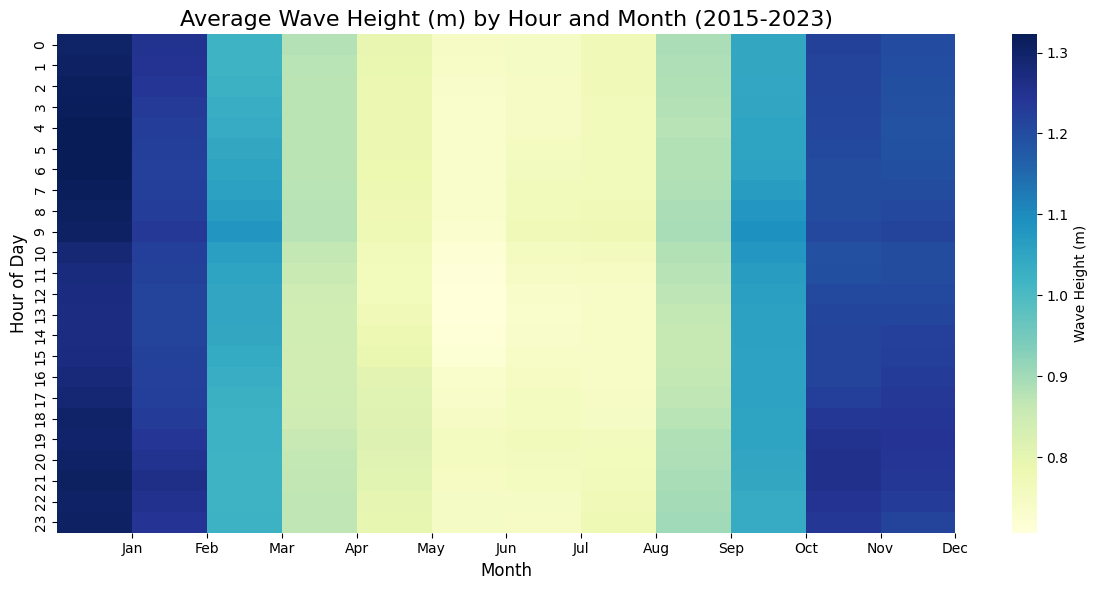

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Load the data
wave_df = historical_wave_1
wave_df['timestamp'] = historical_wave_1['date']

# Step 1: Convert 'timestamp' to datetime if not already done
wave_df['timestamp'] = pd.to_datetime(wave_df['timestamp'])

# Step 2: Extract the hour and month from the 'timestamp'
wave_df['hour'] = wave_df['timestamp'].dt.hour
wave_df['month'] = wave_df['timestamp'].dt.month

# Step 3: Group by month and hour, calculating the mean wave height
wave_hourly_avg = wave_df.groupby(['month', 'hour'])['wave_height'].mean().reset_index()

# Step 4: Pivot the data to have hours as rows and months as columns
heatmap_data = wave_hourly_avg.pivot(index='hour', columns='month', values='wave_height')

# Step 5: Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False, cbar_kws={'label': 'Wave Height (m)'})

# Customize the plot
plt.title('Average Wave Height (m) by Hour and Month (2015-2023)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Hour of Day', fontsize=12)

# Set custom x-tick labels for months (1-12 -> Jan-Dec)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Show the plot
plt.tight_layout()
plt.show()


In [6]:
max_wave_height = wave_df['wave_height'].max()
max_wave_height

5.78

In [7]:
max_wave_period = wave_df['wave_period'].max()
max_wave_period

9.65

In [8]:
corelation_hight_period = wave_df['wave_height'].corr(wave_df['wave_period'])
corelation_hight_period

0.5978252429150772

In [9]:
(lambda: DeepnoteChart(historical_wave_1, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"circle","color":"#2266D3","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":"ascending","type":"temporal","field":"date","scale":{"type":"linear","zero":false},"timeUnit":"monthdatehours"},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"wave_period","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""") if 'DeepnoteChart' in globals() else _dntk.DeepnoteChart(historical_wave_1, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"circle","color":"#2266D3","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":"ascending","type":"temporal","field":"date","scale":{"type":"linear","zero":false},"timeUnit":"monthdatehours"},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"wave_period","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}"""))()

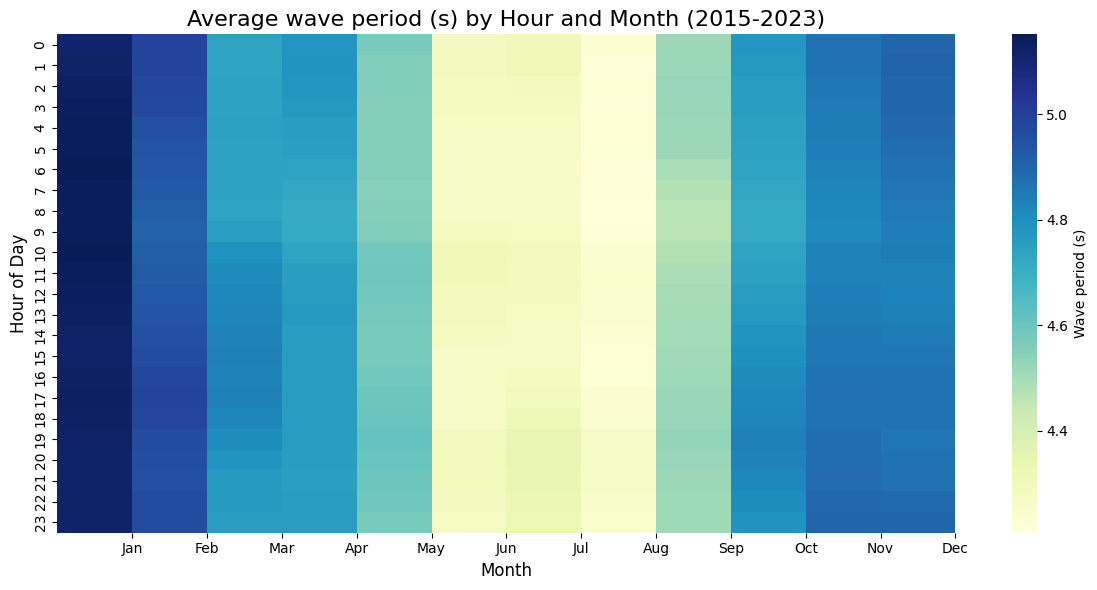

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Step 3: Group by month and hour, calculating the mean wave height
wave_hourly_avg_1 = wave_df.groupby(['month', 'hour'])['wave_period'].mean().reset_index()

# Step 4: Pivot the data to have hours as rows and months as columns
heatmap_data_1 = wave_hourly_avg_1.pivot(index='hour', columns='month', values='wave_period')

# Step 5: Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data_1, cmap='YlGnBu', annot=False, cbar_kws={'label': 'Wave period (s)'})

# Customize the plot
plt.title('Average wave period (s) by Hour and Month (2015-2023)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Hour of Day', fontsize=12)

# Set custom x-tick labels for months (1-12 -> Jan-Dec)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Show the plot
plt.tight_layout()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c6d312a4-2fad-4555-a64a-cb89f1604b41' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>